In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

## Read data

In [2]:
df_ann = pd.read_csv('stats_ann.csv')
df_cll = pd.read_csv('stats_cll.csv')
EDITED = False

In [7]:
df_ann.head()

time  sizex  sizey  sizez   filltype  fill  ndatapts  \
0  2018-12-03T23:32:54.750661  0.005   0.01  0.005       full   100    250000   
1  2018-12-03T23:32:58.734194  0.005   0.01  0.005       full   100    250000   
2  2018-12-03T23:33:02.890560  0.005   0.01  0.005       full   100    250000   
3  2018-12-03T23:33:06.329319  0.005   0.01  0.005  clusters2    11     27648   
4  2018-12-03T23:33:23.968568  0.005   0.01  0.005  clusters2    11     27648   

     ttotal  tksearch  tfrsearch  tprocessing  interactionlistmethod  
0   2.84316  0.013806   0.008978      2.81298                      0  
1   3.04899  0.016442   0.010490      3.00952                      0  
2   2.86906  0.013673   0.009013      2.83881                      0  
3  17.04430  0.042520   0.033066     16.96050                      0  
4  16.76850  0.042704   0.032625     16.68450                      0

In [8]:
df_cll.head()

time  sizex  sizey  sizez filltype  fill  ndatapts  \
0  2018-12-17T16:32:39.548626  0.005   0.01  0.005     full   100    250000   
1  2018-12-17T16:32:40.904473  0.005   0.01  0.005     full   100    250000   
2  2018-12-17T16:32:42.159084  0.005   0.01  0.005     full   100    250000   
3  2018-12-17T16:32:43.317991  0.005   0.01  0.005     full   100    250000   
4  2018-12-17T16:32:44.537045  0.005   0.01  0.005     full   100    250000   

     ttotal  tksearch  tfrsearch  tprocessing  
0  0.006615       NaN        NaN          NaN  
1  0.013004       NaN        NaN          NaN  
2  0.007098       NaN        NaN          NaN  
3  0.007008       NaN        NaN          NaN  
4  0.007359       NaN        NaN          NaN

## Cleanup

In [9]:
if EDITED:
    print("Not reapplying cleanup.")
else:
    EDITED = True
    # fill to percent
    for df in [df_ann,df_cll]:
        df['fill'] = (df['fill']*100).astype(int)


Not reapplying cleanup.


## Laufzeit
Alle durchläufe, nur Trennung nach filltype

### Vergleich zwischen ANN und cell linked list (CLL)
Beachte Achsenskalierung!

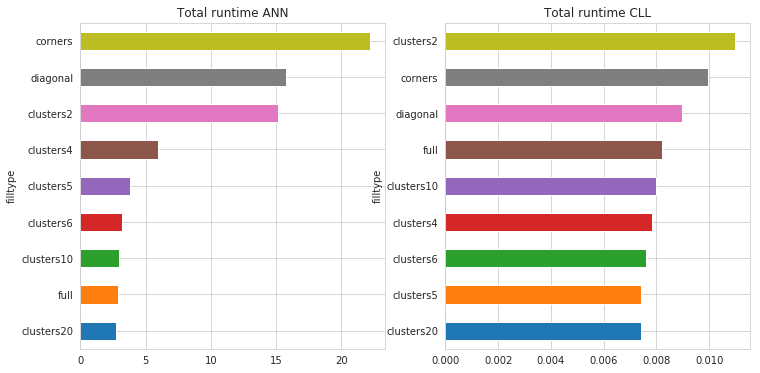

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
df_ann.groupby('filltype').mean().sort_values('ttotal').plot(kind='barh',
                               y='ttotal',
                               legend=False,
                               title='Total runtime ANN',ax = ax1);
df_cll.groupby('filltype').mean().sort_values('ttotal').plot(kind='barh',
                               y='ttotal',
                               legend=False,
                               title='Total runtime CLL',ax = ax2);

### Vergleich der Zeit der Listenerstellung und der Suche bei ANN
$
t_{Suche} = t_{BestimmungAnzahlNachbarn} + t_{BestimmungIndizesNachbarn}
$

Beachte Achsenskalierung!

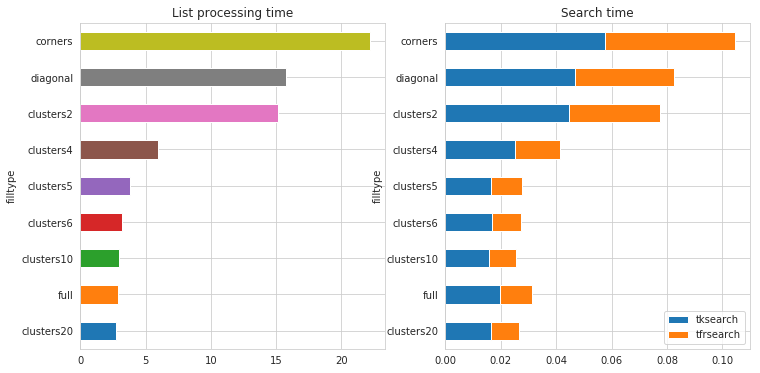

In [17]:
df = df_ann
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
df.groupby('filltype').mean().sort_values('ttotal').plot(kind='barh',
                               y='ttotal',
                               legend=False,
                               title='List processing time',ax = ax1);
df.groupby('filltype').mean().sort_values('ttotal').plot(kind='barh',
                               y=['tksearch',
                                  'tfrsearch'],
                               stacked=True,
                               title='Search time',ax = ax2);